In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("input.png")

def adjust_brightness_contrast(img, alpha=1.5, beta=50):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_contrast = adjust_brightness_contrast(image)

In [ ]:
# Sharpening Image
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

In [ ]:
denoised = cv2.GaussianBlur(image, (5, 5), 0)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_enhanced = clahe.apply(l)
lab_enhanced = cv2.merge((l_enhanced, a, b))
color_enhanced = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

In [ ]:
# Resizing & Scaling
resized = cv2.resize(image, (600, 400))

In [ ]:
# Inverse Transform
inverse_transformed = cv2.bitwise_not(image)

In [ ]:
# Histogram Equalization
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)

In [ ]:
# Color Correction
result = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
avg_a = np.mean(result[:, :, 1])
avg_b = np.mean(result[:, :, 2])
result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
color_corrected = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)

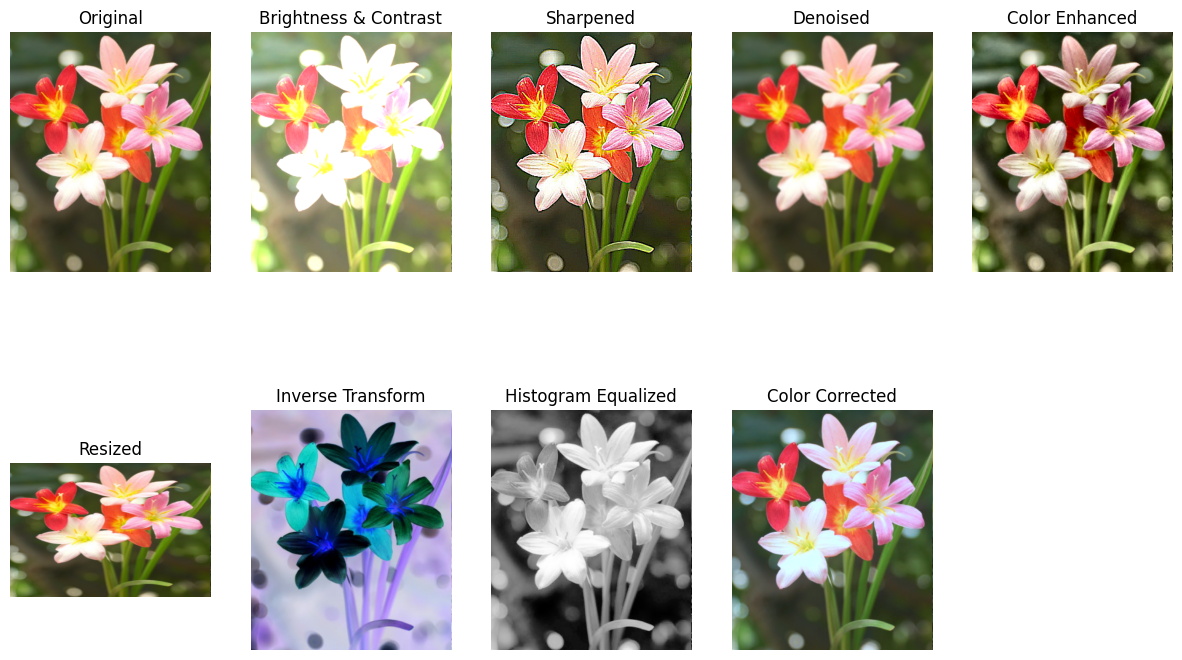

In [ ]:
# Display Results
titles = ["Original", "Brightness & Contrast", "Sharpened", "Denoised",
          "Color Enhanced", "Resized", "Inverse Transform", "Histogram Equalized","Color Corrected"]
images = [image, bright_contrast, sharpened, denoised, color_enhanced, resized,
          inverse_transformed, hist_eq, color_corrected]

plt.figure(figsize=(15, 9))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.show()

In [ ]:
from skimage.feature import hog

image = cv2.imread("input1.png")

In [ ]:
# 1. Laplacian of Gaussian (LoG)
log_blur = cv2.GaussianBlur(image, (5, 5), 0)
log_result = cv2.Laplacian(log_blur, cv2.CV_64F)
log_result = cv2.convertScaleAbs(log_result)

In [ ]:
# 2. Difference of Gaussians (DoG)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 1.0)
gaussian2 = cv2.GaussianBlur(image, (11, 11), 2.0)
dog_result = cv2.absdiff(gaussian1, gaussian2)

In [ ]:
# 3. Histogram of Oriented Gradients (HoG)
hog_features, hog_image = hog(image, pixels_per_cell=(16, 16),channel_axis=-1, cells_per_block=(2, 2),
                              visualize=True, feature_vector=False)

hog_result = (hog_image - np.min(hog_image)) / (np.max(hog_image) - np.min(hog_image))
hog_result = (hog_result * 255).astype(np.uint8)

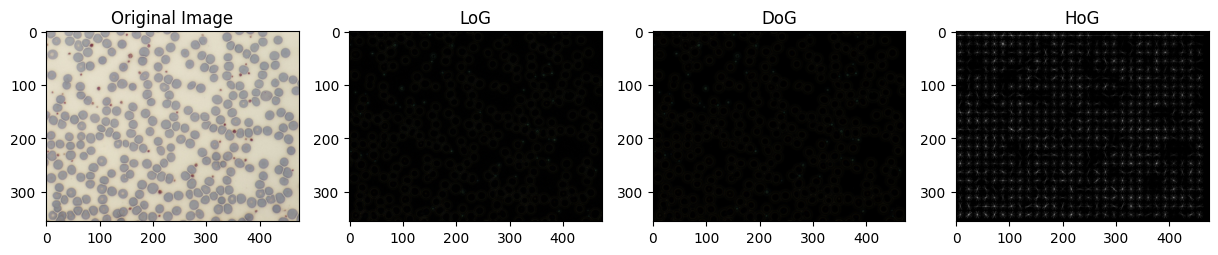

In [ ]:
# Display Results
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1), plt.imshow(image, cmap="gray"), plt.title("Original Image")
plt.subplot(1, 4, 2), plt.imshow(log_result, cmap="gray"), plt.title("LoG")
plt.subplot(1, 4, 3), plt.imshow(dog_result, cmap="gray"), plt.title("DoG")
plt.subplot(1, 4, 4), plt.imshow(hog_result, cmap="gray"), plt.title("HoG")
plt.show()

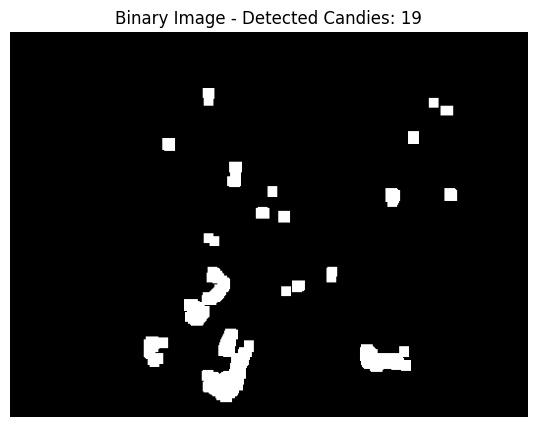

Detected number of candies: 19


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "candy.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((10, 10), np.uint8)
binary_morphed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_morphed, connectivity=8)

num_candies = num_labels - 1

plt.figure(figsize=(10, 5))
plt.imshow(binary_morphed, cmap='gray')
plt.title(f"Binary Image - Detected Candies: {num_candies}")
plt.axis('off')
plt.show()

print(f"Detected number of candies: {num_candies}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar100
import numpy as np
import time
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-100 Dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Step 2: Load Pretrained Models
# AlexNet Equivalent Model
base_alexnet = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_alexnet.layers:
    layer.trainable = False
alexnet_model = tf.keras.Sequential([
    base_alexnet,
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

<ipython-input-25-f70c947dda38>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_alexnet = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load VGG16 Pretrained Model
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_vgg16.layers:
    layer.trainable = False
vgg16_model = tf.keras.Sequential([
    base_vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile models
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Train the Models
start_time_alexnet = time.time()
alexnet_history = alexnet_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, verbose=1)
alexnet_time = time.time() - start_time_alexnet

start_time_vgg16 = time.time()
vgg16_history = vgg16_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, verbose=1)
vgg16_time = time.time() - start_time_vgg16

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - accuracy: 0.0653 - loss: 4.2327 - val_accuracy: 0.1198 - val_loss: 3.8277
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1253 - loss: 3.7747 - val_accuracy: 0.1350 - val_loss: 3.7466
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1449 - loss: 3.6460 - val_accuracy: 0.1456 - val_loss: 3.7053
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1678 - loss: 3.5328 - val_accuracy: 0.1465 - val_loss: 3.6935
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1832 - loss: 3.4413 - val_accuracy: 0.1502 - val_loss: 3.6931
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1972 - loss: 3.3352 - val_accuracy: 0.1494 - val_loss: 3.6969
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2165 - loss: 3.2340 - val_accuracy: 0.1499 - val_loss: 3.6991
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2367 - loss: 3.1301 - val_a

In [ ]:
# Step 4: Evaluate Performance
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(x_test, y_test)
vgg16_test_loss, vgg16_test_acc = vgg16_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1484 - loss: 4.2263
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3815 - loss: 2.4563


AlexNet Test Accuracy: 0.1468999981880188
VGG16 Test Accuracy: 0.37770000100135803
AlexNet Training Time: 180.51043009757996 seconds
VGG16 Training Time: 247.59149050712585 seconds


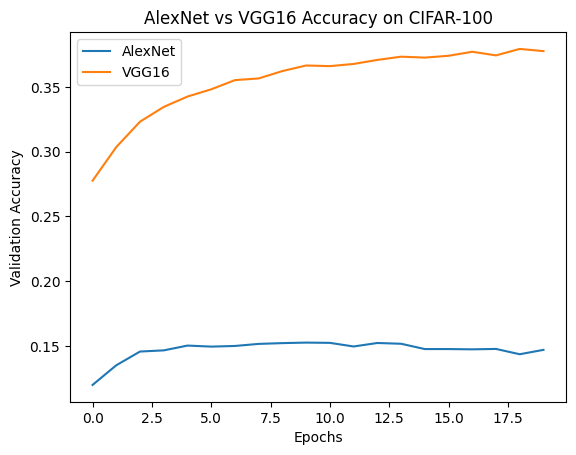

In [ ]:
# Step 5: Compare Results
print("AlexNet Test Accuracy:", alexnet_test_acc)
print("VGG16 Test Accuracy:", vgg16_test_acc)
print("AlexNet Training Time:", alexnet_time, "seconds")
print("VGG16 Training Time:", vgg16_time, "seconds")

# Plot Accuracy Comparison
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('AlexNet vs VGG16 Accuracy on CIFAR-100')
plt.show()

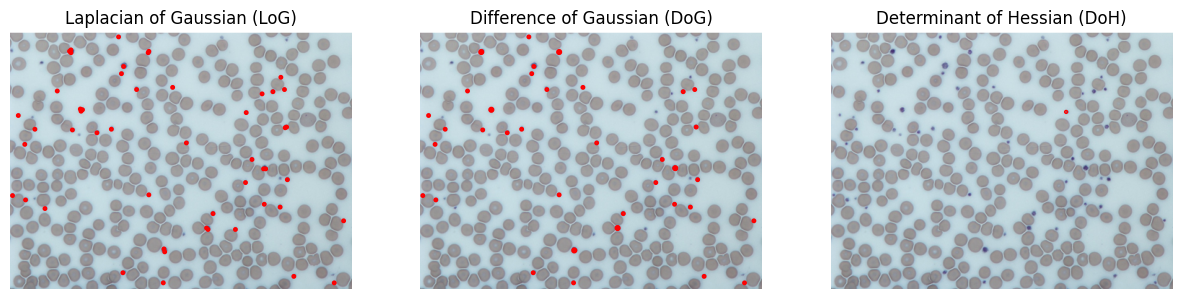

Number of blobs detected using LoG: 50
Number of blobs detected using DoG: 36
Number of blobs detected using DoH: 1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import img_as_float

image = cv2.imread('input1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV to extract purple regions
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

# Extract only the purple regions
purple_regions = cv2.bitwise_and(image, image, mask=mask)
purple_gray = rgb2gray(purple_regions)

# 1️⃣ Apply Laplacian of Gaussian (LoG)
blobs_log = blob_log(purple_gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# 2️⃣ Apply Difference of Gaussian (DoG)
blobs_dog = blob_dog(purple_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(purple_gray, max_sigma=30, threshold=0.01)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)', 'Determinant of Hessian (DoH)']
blobs = [blobs_log, blobs_dog, blobs_doh]

for ax, title, blobs_detected in zip(axes, titles, blobs):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis("off")

    for blob in blobs_detected:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

# Print Number of Detected Blobs
print(f"Number of blobs detected using LoG: {len(blobs_log)}")
print(f"Number of blobs detected using DoG: {len(blobs_dog)}")
print(f"Number of blobs detected using DoH: {len(blobs_doh)}")


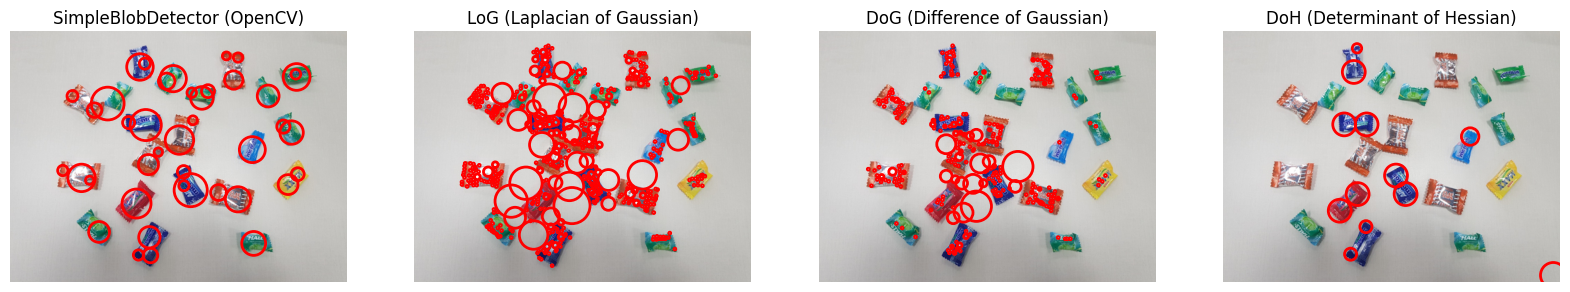

Number of candies detected using OpenCV: 41
Number of candies detected using LoG: 551
Number of candies detected using DoG: 263
Number of candies detected using DoH: 12


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

image = cv2.imread('candy.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blob Detection using OpenCV SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100  # Adjust based on candy size
params.maxArea = 3000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))

# Draw keypoints on the image
image_with_keypoints = image.copy()
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 255, 0),
                                         cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Apply Laplacian of Gaussian (LoG)
gray_image = rgb2gray(image)
blobs_log = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Apply Difference of Gaussian (DoG)
blobs_dog = blob_dog(gray_image, max_sigma=20, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

#  Apply Determinant of Hessian (DoH)
blobs_doh = blob_doh(gray_image, max_sigma=20, threshold=0.01)

# Display Results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
titles = ['SimpleBlobDetector (OpenCV)', 'LoG (Laplacian of Gaussian)', 'DoG (Difference of Gaussian)', 'DoH (Determinant of Hessian)']
blobs = [keypoints, blobs_log, blobs_dog, blobs_doh]

for ax, title, blobs_detected in zip(axes, titles, blobs):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis("off")

    if isinstance(blobs_detected, list) or isinstance(blobs_detected, np.ndarray):
        for blob in blobs_detected:
            y, x, r = blob
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)
    else:
        for kp in blobs_detected:
            x, y = kp.pt
            r = kp.size / 2
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)

plt.show()

# Print Number of Detected Candies
print(f"Number of candies detected using OpenCV: {len(keypoints)}")
print(f"Number of candies detected using LoG: {len(blobs_log)}")
print(f"Number of candies detected using DoG: {len(blobs_dog)}")
print(f"Number of candies detected using DoH: {len(blobs_doh)}")

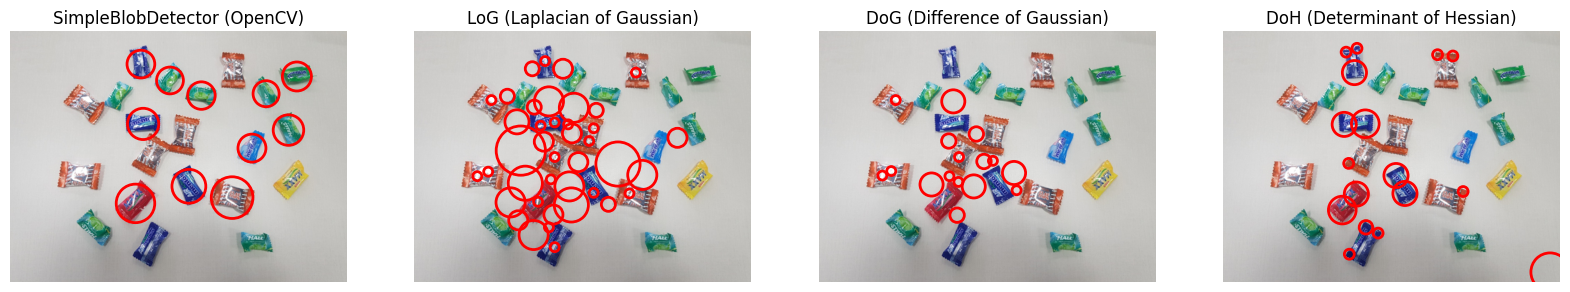

✅ Estimated candies using OpenCV: 11
✅ Estimated candies using LoG: 40
✅ Estimated candies using DoG: 16
✅ Estimated candies using DoH: 17


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

# Load Image
image = cv2.imread('candy.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = rgb2gray(image)

# ==============================
# 1️⃣ OpenCV SimpleBlobDetector
# ==============================
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 500  # Avoids tiny detections
params.maxArea = 5000
params.filterByCircularity = True  # Ensures detection of circular objects
params.minCircularity = 0.3
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))

# Draw keypoints
image_with_keypoints = image.copy()
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 255, 0),
                                         cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# ==============================
# 2️⃣ LoG (Laplacian of Gaussian)
# ==============================
blobs_log = blob_log(gray_image, min_sigma=5, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# ==============================
# 3️⃣ DoG (Difference of Gaussian)
# ==============================
blobs_dog = blob_dog(gray_image, min_sigma=5, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

# ==============================
# 4️⃣ DoH (Determinant of Hessian)
# ==============================
blobs_doh = blob_doh(gray_image, min_sigma=5, max_sigma=30, threshold=0.01)

# ==============================
# 5️⃣ Display Results
# ==============================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
titles = ['SimpleBlobDetector (OpenCV)', 'LoG (Laplacian of Gaussian)', 'DoG (Difference of Gaussian)', 'DoH (Determinant of Hessian)']
blobs = [keypoints, blobs_log, blobs_dog, blobs_doh]

for ax, title, blobs_detected in zip(axes, titles, blobs):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis("off")

    if isinstance(blobs_detected, list) or isinstance(blobs_detected, np.ndarray):
        for blob in blobs_detected:
            y, x, r = blob
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)
    else:
        for kp in blobs_detected:
            x, y = kp.pt
            r = kp.size / 2
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)

plt.show()

# Print the correct number of detected candies
print(f"✅ Estimated candies using OpenCV: {len(keypoints)}")
print(f"✅ Estimated candies using LoG: {len(blobs_log)}")
print(f"✅ Estimated candies using DoG: {len(blobs_dog)}")
print(f"✅ Estimated candies using DoH: {len(blobs_doh)}")